<a href="https://colab.research.google.com/github/abkerper/DS4002_Project2/blob/main/draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/abkerper/DS4002_Project2

fatal: destination path 'DS4002_Project2' already exists and is not an empty directory.


In [43]:
import numpy as np
import pandas as pd
import datetime
from pandas import read_csv
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

In [17]:
df1 = pd.read_csv('/content/SA_0000001400.csv')
df2 = pd.read_csv('/content/SA_0000001688.csv')

In [20]:
df = pd.concat([df1,df2])

In [30]:
display(df.columns)

Index(['Id', 'IndicatorCode', 'SpatialDimension', 'SpatialDimensionValueCode',
       'ParentLocationCode', 'ParentLocation', 'TimeDimension', 'TimeDim',
       'DisaggregatingDimension1', 'DisaggregatingDimension1ValueCode',
       'DisaggregatingDimension2', 'DisaggregatingDimension2ValueCode',
       'DisaggregatingDimension3', 'DisaggregatingDimension3ValueCode',
       'DataSourceDimension', 'DataSourceDimensionValueCode', 'Value',
       'NumericValue', 'Low', 'High', 'Comments', 'Date', 'TimeDimensionValue',
       'TimeDimensionBegin', 'TimeDimensionEnd'],
      dtype='object')

In [36]:
display(df['DisaggregatingDimension1'].unique())

array(['ALCOHOLTYPE', 'SEX'], dtype=object)

In [28]:
df = df[df['SpatialDimension']=='COUNTRY']

In [26]:
display(df['SpatialDimension'].unique())

array(['COUNTRY', 'UNREGION', 'GLOBAL', 'REGION'], dtype=object)

In [37]:
test1 = df[df['DisaggregatingDimension1']=='ALCOHOLTYPE']

In [38]:
test1['Value'] = pd.to_numeric(test1['Value'], errors = 'coerce')
test1 = test1.dropna(subset = ['Value'])

<ipython-input-38-9feb8b8ed2f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['Value'] = pd.to_numeric(test1['Value'], errors = 'coerce')


                               SARIMAX Results                                
Dep. Variable:                  Value   No. Observations:                48924
Model:                 ARIMA(5, 1, 0)   Log Likelihood             -126533.276
Date:                Wed, 16 Oct 2024   AIC                         253078.551
Time:                        16:42:45   BIC                         253131.339
Sample:                             0   HQIC                        253095.104
                              - 48924                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8409      0.004   -198.499      0.000      -0.849      -0.833
ar.L2         -0.6801      0.005   -126.500      0.000      -0.691      -0.670
ar.L3         -0.5055      0.006    -88.661      0.0

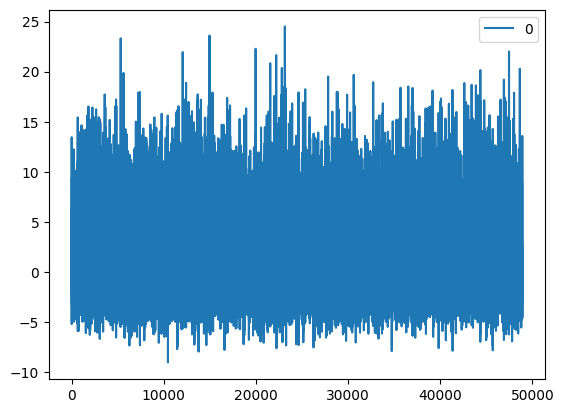

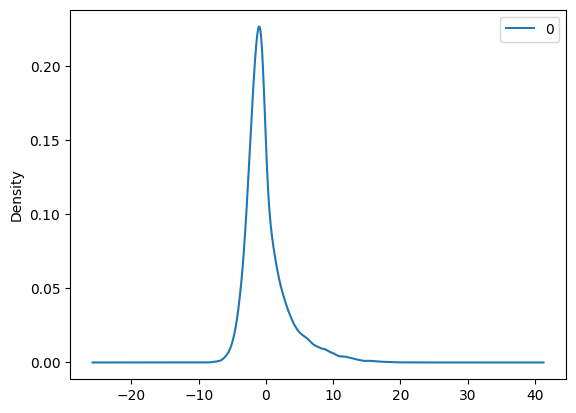

                  0
count  48924.000000
mean       0.000122
std        3.213719
min       -9.020494
25%       -1.890736
50%       -0.760421
75%        0.969676
max       24.508678


In [44]:
model = ARIMA(test1['Value'], order=(5,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [ ]:
https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/